## Importing neccessary library

In [1]:
import numpy as np
import pandas as pd
from  sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score,recall_score,accuracy_score,classification_report,confusion_matrix,f1_score,confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("fetal_health.csv",sep=',')
df

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


In [3]:
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


### checking missing values

In [6]:
df.isna().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

<Axes: xlabel='fetal_health', ylabel='count'>

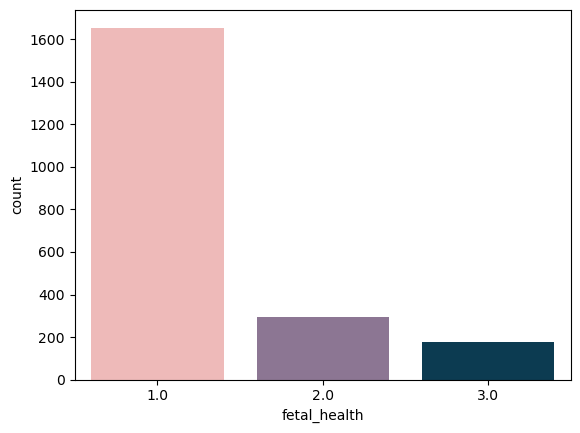

In [7]:
colours=["#f7b2b0","#8f7198", "#003f5c"]
sns.countplot(data= df, x="fetal_health",palette=colours)


### model selection

In [8]:
x=df.drop(['fetal_health'],axis=1)
y=df['fetal_health']

In [9]:
columns_names = list(x.columns)
sd=StandardScaler()
x_df=sd.fit_transform(x)
x_df=pd.DataFrame(x_df,columns=columns_names)

In [10]:
x_df

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,-1.352220,-0.822388,-0.203210,-1.482465,-0.638438,-0.057476,-0.268754,1.513190,-0.943095,1.802542,...,-0.165507,-1.068562,-2.119592,-0.701397,-0.458444,-1.065614,0.153270,-1.181642,1.870569,1.112980
1,-0.132526,0.730133,-0.203210,0.554627,0.375243,-0.057476,-0.268754,-1.744751,0.868841,-0.535361,...,1.529124,-0.865539,1.893794,0.655137,0.958201,0.216638,0.089126,0.132038,-0.234998,-0.524526
2,-0.030884,-0.046128,-0.203210,1.233657,0.375243,-0.057476,-0.268754,-1.802928,0.868841,-0.535361,...,1.529124,-0.865539,1.893794,0.316003,0.958201,0.216638,0.024982,-0.006244,-0.200481,-0.524526
3,0.070757,-0.046128,-0.203210,1.233657,0.375243,-0.057476,-0.268754,-1.802928,1.208579,-0.535361,...,1.195333,-1.373097,0.333033,2.350804,-0.458444,-0.027600,-0.039162,-0.075385,-0.200481,1.112980
4,-0.132526,0.988886,-0.203210,1.233657,-0.638438,-0.057476,-0.268754,-1.802928,1.208579,-0.535361,...,1.195333,-1.373097,0.333033,1.672537,-0.458444,-0.027600,0.089126,-0.006244,-0.269516,1.112980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,0.680604,-0.822388,-0.203210,0.894142,-0.638438,-0.057476,-0.268754,1.862255,-1.282833,0.823885,...,-0.781736,1.469229,0.723223,-0.023130,-0.458444,0.949354,0.987141,0.961731,-0.580173,-0.524526
2122,0.680604,-0.563635,-0.203210,0.894142,-0.638438,-0.057476,-0.268754,1.804078,-1.056341,0.660775,...,-0.114154,0.318764,0.277292,0.655137,-0.458444,0.888294,0.858853,0.892590,-0.545656,1.112980
2123,0.680604,-0.563635,-0.203210,0.894142,-0.638438,-0.057476,-0.268754,1.862255,-1.056341,0.552035,...,-0.088478,0.318764,0.333033,0.316003,-0.458444,0.949354,0.858853,0.961731,-0.511138,1.112980
2124,0.680604,-0.563635,-0.203210,0.554627,-0.638438,-0.057476,-0.268754,1.804078,-1.056341,0.932624,...,-0.114154,0.318764,0.277292,0.655137,-0.458444,0.888294,0.794709,0.892590,-0.511138,1.112980


In [11]:
x_train,x_test,y_train,y_test=train_test_split(x_df,y,test_size=0.3,random_state=42)

### Building models

In [12]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

acccuracy_l = accuracy_score(y_test, y_pred)
report=classification_report(y_test,y_pred)

acccuracy_l=round(acccuracy_l,2)
print("********* Logistic regression Results *********")
print("Accuracy    : ", acccuracy_l)
print('------------------------------------------------')
print('classification_report :')
print(report)

********* Logistic regression Results *********
Accuracy    :  0.88
------------------------------------------------
classification_report :
              precision    recall  f1-score   support

         1.0       0.94      0.94      0.94       496
         2.0       0.68      0.62      0.65       101
         3.0       0.65      0.83      0.73        41

    accuracy                           0.88       638
   macro avg       0.76      0.80      0.77       638
weighted avg       0.88      0.88      0.88       638



In [13]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)

acccuracy_d = accuracy_score(y_test, y_pred)
report=classification_report(y_test,y_pred)
acccuracy_d=round(acccuracy_d,2)
print("********* Decision tree Results *********")
print("Accuracy    : ", acccuracy_d)
print('------------------------------------------------')
print('classification_report :')
print(report)

********* Decision tree Results *********
Accuracy    :  0.93
------------------------------------------------
classification_report :
              precision    recall  f1-score   support

         1.0       0.95      0.96      0.95       496
         2.0       0.83      0.78      0.81       101
         3.0       0.89      0.95      0.92        41

    accuracy                           0.93       638
   macro avg       0.89      0.90      0.89       638
weighted avg       0.93      0.93      0.93       638



In [14]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

acccuracy_r = accuracy_score(y_test, y_pred)
report=classification_report(y_test,y_pred)
acccuracy_r=round(acccuracy_r,2)
print("********* Random forest Results *********")
print("Accuracy    : ", acccuracy_r)
print('------------------------------------------------')
print('classification_report :')
print(report)

********* Random forest Results *********
Accuracy    :  0.95
------------------------------------------------
classification_report :
              precision    recall  f1-score   support

         1.0       0.96      0.98      0.97       496
         2.0       0.92      0.78      0.84       101
         3.0       0.86      0.93      0.89        41

    accuracy                           0.95       638
   macro avg       0.91      0.90      0.90       638
weighted avg       0.95      0.95      0.95       638



In [15]:
svm=SVC(kernel='linear')
svm.fit(x_train,y_train)
y_pred=svm.predict(x_test)

acccuracy_s = accuracy_score(y_test, y_pred)
report=classification_report(y_test,y_pred)

acccuracy_s=round(acccuracy_s,2)
print("********* support vector machine Results *********")
print("Accuracy    : ", acccuracy_s)
print('------------------------------------------------')
print('classification_report :')
print(report)

********* support vector machine Results *********
Accuracy    :  0.9
------------------------------------------------
classification_report :
              precision    recall  f1-score   support

         1.0       0.96      0.94      0.95       496
         2.0       0.70      0.69      0.70       101
         3.0       0.73      0.85      0.79        41

    accuracy                           0.90       638
   macro avg       0.79      0.83      0.81       638
weighted avg       0.90      0.90      0.90       638



In [16]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

acccuracy_k = accuracy_score(y_test, y_pred)
report=classification_report(y_test,y_pred)

acccuracy_k=round(acccuracy_k,2)
print("********* support vector machine Results *********")
print("Accuracy    : ", acccuracy_k)
print('------------------------------------------------')
print('classification_report :')
print(report)

********* support vector machine Results *********
Accuracy    :  0.91
------------------------------------------------
classification_report :
              precision    recall  f1-score   support

         1.0       0.94      0.96      0.95       496
         2.0       0.79      0.69      0.74       101
         3.0       0.76      0.83      0.79        41

    accuracy                           0.91       638
   macro avg       0.83      0.83      0.83       638
weighted avg       0.91      0.91      0.91       638



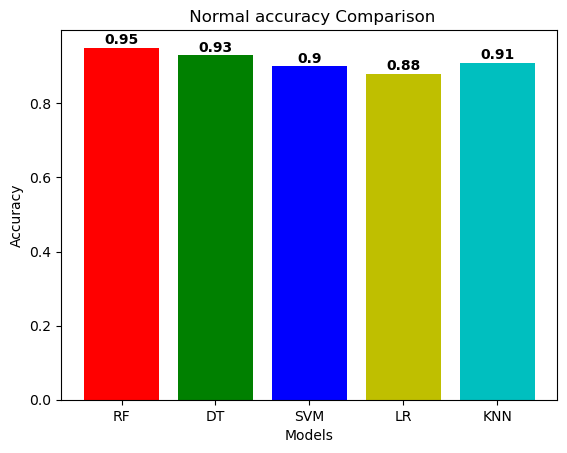

In [17]:
model_names=['RF','DT','SVM','LR','KNN']
accuracy_values=[acccuracy_r,acccuracy_d,acccuracy_s,acccuracy_l,acccuracy_k]
colors = np.array(['r', 'g', 'b', 'y', 'c'])
plt.bar(model_names, accuracy_values,color=colors)
for i, v in enumerate(accuracy_values):
    plt.text(i, v+0.01, str(v), ha='center', fontweight='bold')
plt.title(' Normal accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.show()

##### maximum accuarcy  is 94.33 and the used is RandomforestClassifier

## oversampling and undersampling

In [18]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

### Undersampling

In [19]:
rus=RandomUnderSampler(random_state=0)
x_res,y_res=rus.fit_resample(x_df,y)
print((Counter(y_res)))

Counter({1.0: 176, 2.0: 176, 3.0: 176})


In [20]:
x_train,x_test,y_train,y_test=train_test_split(x_res,y_res,test_size=0.3,random_state=42)

In [21]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

acccuracy_r = accuracy_score(y_test, y_pred)
report=classification_report(y_test,y_pred)
u_acccuracy_r=round(acccuracy_r,2)
print("********* Random forest Results *********")
print("Accuracy    : ", acccuracy_r)
print('------------------------------------------------')
print('classification_report :')
print(report)

********* Random forest Results *********
Accuracy    :  0.8930817610062893
------------------------------------------------
classification_report :
              precision    recall  f1-score   support

         1.0       0.96      0.84      0.90        57
         2.0       0.80      0.90      0.84        48
         3.0       0.93      0.94      0.94        54

    accuracy                           0.89       159
   macro avg       0.89      0.89      0.89       159
weighted avg       0.90      0.89      0.89       159



In [22]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)

acccuracy_d = accuracy_score(y_test, y_pred)
report=classification_report(y_test,y_pred)
u_acccuracy_d=round(acccuracy_d,2)
print("********* Decision tree Results *********")
print("Accuracy    : ", acccuracy_d)
print('------------------------------------------------')
print('classification_report :')
print(report)

********* Decision tree Results *********
Accuracy    :  0.8364779874213837
------------------------------------------------
classification_report :
              precision    recall  f1-score   support

         1.0       0.83      0.84      0.83        57
         2.0       0.75      0.79      0.77        48
         3.0       0.94      0.87      0.90        54

    accuracy                           0.84       159
   macro avg       0.84      0.83      0.84       159
weighted avg       0.84      0.84      0.84       159



In [23]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

acccuracy_l = accuracy_score(y_test, y_pred)
report=classification_report(y_test,y_pred)

u_acccuracy_l=round(acccuracy_l,2)
print("********* Logistic regression Results *********")
print("Accuracy    : ", acccuracy_l)
print('------------------------------------------------')
print('classification_report :')
print(report)

********* Logistic regression Results *********
Accuracy    :  0.8113207547169812
------------------------------------------------
classification_report :
              precision    recall  f1-score   support

         1.0       0.85      0.82      0.84        57
         2.0       0.73      0.77      0.75        48
         3.0       0.85      0.83      0.84        54

    accuracy                           0.81       159
   macro avg       0.81      0.81      0.81       159
weighted avg       0.81      0.81      0.81       159



In [24]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

acccuracy_k = accuracy_score(y_test, y_pred)
report=classification_report(y_test,y_pred)

u_acccuracy_k=round(acccuracy_k,2)
print("********* support vector machine Results *********")
print("Accuracy    : ", acccuracy_k)
print('------------------------------------------------')
print('classification_report :')
print(report)

********* support vector machine Results *********
Accuracy    :  0.7987421383647799
------------------------------------------------
classification_report :
              precision    recall  f1-score   support

         1.0       0.91      0.75      0.83        57
         2.0       0.65      0.81      0.72        48
         3.0       0.87      0.83      0.85        54

    accuracy                           0.80       159
   macro avg       0.81      0.80      0.80       159
weighted avg       0.82      0.80      0.80       159



In [25]:
svm=SVC(kernel='linear')
svm.fit(x_train,y_train)
y_pred=svm.predict(x_test)

acccuracy_s = accuracy_score(y_test, y_pred)
report=classification_report(y_test,y_pred)

u_acccuracy_s=round(acccuracy_s,2)
print("********* support vector machine Results *********")
print("Accuracy    : ", acccuracy_s)
print('------------------------------------------------')
print('classification_report :')
print(report)

********* support vector machine Results *********
Accuracy    :  0.8301886792452831
------------------------------------------------
classification_report :
              precision    recall  f1-score   support

         1.0       0.86      0.84      0.85        57
         2.0       0.75      0.81      0.78        48
         3.0       0.88      0.83      0.86        54

    accuracy                           0.83       159
   macro avg       0.83      0.83      0.83       159
weighted avg       0.83      0.83      0.83       159



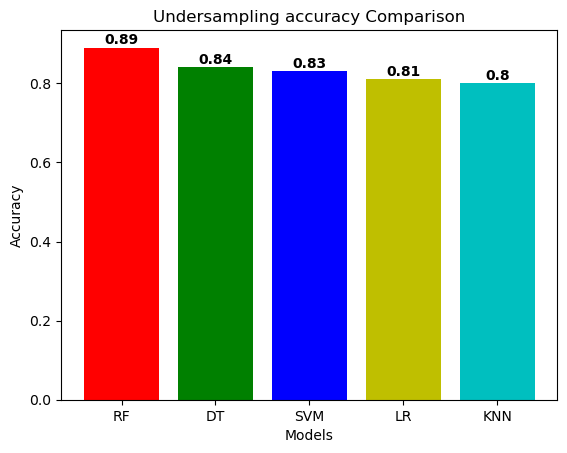

In [26]:
model_names=['RF','DT','SVM','LR','KNN']
accuracy_values=[u_acccuracy_r,u_acccuracy_d,u_acccuracy_s,u_acccuracy_l,u_acccuracy_k]
colors = np.array(['r', 'g', 'b', 'y', 'c'])
plt.bar(model_names, accuracy_values,color=colors)
for i, v in enumerate(accuracy_values):
    plt.text(i, v+0.01, str(v), ha='center', fontweight='bold')
plt.title('Undersampling accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.show()

##### maxium accuracy after undersampling is 89.30 an the algorithm used is Random forest 

### oversampling

In [27]:
ros=RandomOverSampler(random_state=0)
x_res,y_res=ros.fit_resample(x_df,y)
print((Counter(y_res)))

Counter({2.0: 1655, 1.0: 1655, 3.0: 1655})


In [28]:
x_train,x_test,y_train,y_test=train_test_split(x_res,y_res,test_size=0.3,random_state=42)

In [29]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

acccuracy_r = accuracy_score(y_test, y_pred)
report=classification_report(y_test,y_pred)
o_acccuracy_r=round(acccuracy_r,2)
print("********* Random forest Results *********")
print("Accuracy    : ", acccuracy_r)
print('------------------------------------------------')
print('classification_report :')
print(report)
print("confusion matrix : \n",confusion_matrix(y_test,y_pred))

********* Random forest Results *********
Accuracy    :  0.9818791946308725
------------------------------------------------
classification_report :
              precision    recall  f1-score   support

         1.0       1.00      0.95      0.97       520
         2.0       0.95      1.00      0.97       485
         3.0       1.00      1.00      1.00       485

    accuracy                           0.98      1490
   macro avg       0.98      0.98      0.98      1490
weighted avg       0.98      0.98      0.98      1490

confusion matrix : 
 [[493  25   2]
 [  0 485   0]
 [  0   0 485]]


In [30]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)

acccuracy_d = accuracy_score(y_test, y_pred)
report=classification_report(y_test,y_pred)
o_acccuracy_d=round(acccuracy_d,2)
print("********* Decision tree Results *********")
print("Accuracy    : ", acccuracy_d)
print('------------------------------------------------')
print('classification_report :')
print(report)
print("confusion matrix : \n",confusion_matrix(y_test,y_pred))

********* Decision tree Results *********
Accuracy    :  0.9731543624161074
------------------------------------------------
classification_report :
              precision    recall  f1-score   support

         1.0       1.00      0.92      0.96       520
         2.0       0.93      1.00      0.96       485
         3.0       0.99      1.00      1.00       485

    accuracy                           0.97      1490
   macro avg       0.97      0.97      0.97      1490
weighted avg       0.97      0.97      0.97      1490

confusion matrix : 
 [[480  36   4]
 [  0 485   0]
 [  0   0 485]]


In [31]:
svm=SVC(kernel='linear')
svm.fit(x_train,y_train)
y_pred=svm.predict(x_test)

acccuracy_s = accuracy_score(y_test, y_pred)
report=classification_report(y_test,y_pred)

o_acccuracy_s=round(acccuracy_s,2)
print("********* support vector machine Results *********")
print("Accuracy    : ", acccuracy_s)
print('------------------------------------------------')
print('classification_report :')
print(report)
print("confusion matrix : \n",confusion_matrix(y_test,y_pred))

********* support vector machine Results *********
Accuracy    :  0.8651006711409396
------------------------------------------------
classification_report :
              precision    recall  f1-score   support

         1.0       0.95      0.86      0.91       520
         2.0       0.77      0.88      0.82       485
         3.0       0.90      0.85      0.87       485

    accuracy                           0.87      1490
   macro avg       0.87      0.87      0.87      1490
weighted avg       0.87      0.87      0.87      1490

confusion matrix : 
 [[448  62  10]
 [ 18 429  38]
 [  4  69 412]]


In [32]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

acccuracy_k = accuracy_score(y_test, y_pred)
report=classification_report(y_test,y_pred)

o_acccuracy_k=round(acccuracy_k,2)
print("********* K-Nearest Neighbours Results *********")
print("Accuracy    : ", acccuracy_k)
print('------------------------------------------------')
print('classification_report :')
print(report)
print("confusion matrix :\n ",confusion_matrix(y_test,y_pred))

********* K-Nearest Neighbours Results *********
Accuracy    :  0.959731543624161
------------------------------------------------
classification_report :
              precision    recall  f1-score   support

         1.0       0.99      0.89      0.94       520
         2.0       0.90      0.99      0.94       485
         3.0       0.99      1.00      1.00       485

    accuracy                           0.96      1490
   macro avg       0.96      0.96      0.96      1490
weighted avg       0.96      0.96      0.96      1490

confusion matrix :
  [[464  52   4]
 [  4 481   0]
 [  0   0 485]]


In [33]:
lr=LogisticRegression(max_iter=3000)
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

acccuracy_l = accuracy_score(y_test, y_pred)
report=classification_report(y_test,y_pred)

o_acccuracy_l=round(acccuracy_l,2)
print("********* Logistic regression Results *********")
print("Accuracy    : ", acccuracy_l)
print('------------------------------------------------')
print('classification_report :')
print(report)
print("confusion matrix : \n",confusion_matrix(y_test,y_pred))

********* Logistic regression Results *********
Accuracy    :  0.8651006711409396
------------------------------------------------
classification_report :
              precision    recall  f1-score   support

         1.0       0.93      0.87      0.90       520
         2.0       0.79      0.86      0.82       485
         3.0       0.88      0.86      0.87       485

    accuracy                           0.87      1490
   macro avg       0.87      0.87      0.87      1490
weighted avg       0.87      0.87      0.87      1490

confusion matrix : 
 [[451  58  11]
 [ 22 419  44]
 [ 10  56 419]]


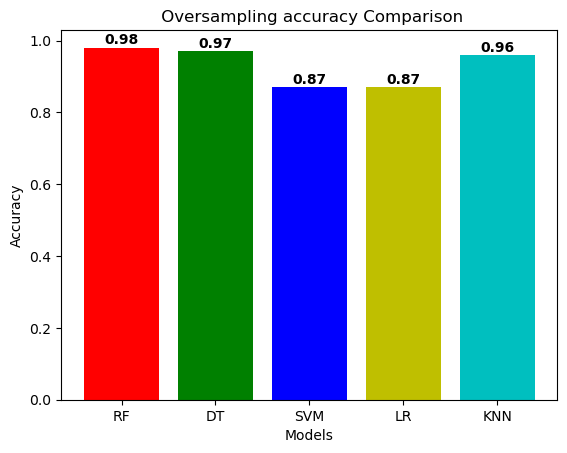

In [34]:
model_names=['RF','DT','SVM','LR','KNN']
accuracy_values=[o_acccuracy_r,o_acccuracy_d,o_acccuracy_s,o_acccuracy_l,o_acccuracy_k]
colors = np.array(['r', 'g', 'b', 'y', 'c'])
plt.bar(model_names, accuracy_values,color=colors)
for i, v in enumerate(accuracy_values):
    plt.text(i, v+0.01, str(v), ha='center', fontweight='bold')
plt.title(' Oversampling accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.show()

##### maximum accuarcy after oversampling 98.05 and the algorithm used is Random forest 

### compare acutual and predicted value produced by random forest(oversampling)

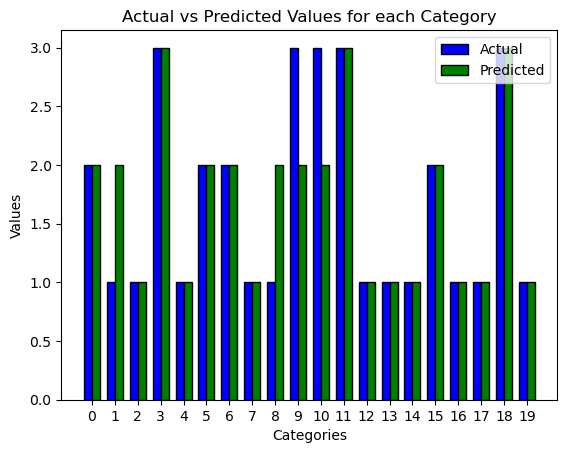

In [35]:
import matplotlib.pyplot as plt
import numpy as np

# Define the actual and predicted values for each category
categories =np.arange(20)
actual_values = y_test[:20]
predicted_values = y_pred[:20]

# Set the width of the bars
bar_width = 0.35

# Set the positions of the bars on the x-axis
r1 = np.arange(len(categories))
r2 = [x + bar_width for x in r1]

# Plot the bars
plt.bar(r1, actual_values, width=bar_width, color='blue', edgecolor='black', label='Actual')
plt.bar(r2, predicted_values, width=bar_width, color='green', edgecolor='black', label='Predicted')

# Add labels, title, and legend
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Actual vs Predicted Values for each Category')
plt.xticks([r + bar_width/2 for r in range(len(categories))], categories)
plt.legend()

# Show the plot
plt.show()


## feature selection


In [36]:
from sklearn import decomposition
pca=decomposition.PCA(n_components=17)
x_new=pca.fit_transform(x_df)

In [37]:
x_new.shape

(2126, 17)

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x_new,y,test_size=0.3,random_state=42)

In [39]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

dr_acccuracy_r = accuracy_score(y_test, y_pred)
report=classification_report(y_test,y_pred)
dr_acccuracy_r=round(dr_acccuracy_r,2)
print("********* Random forest Results *********")
print("Accuracy    : ", dr_acccuracy_r)
print('------------------------------------------------')
print('classification_report :')
print(report)

********* Random forest Results *********
Accuracy    :  0.91
------------------------------------------------
classification_report :
              precision    recall  f1-score   support

         1.0       0.93      0.97      0.95       496
         2.0       0.81      0.63      0.71       101
         3.0       0.88      0.88      0.88        41

    accuracy                           0.91       638
   macro avg       0.87      0.83      0.85       638
weighted avg       0.91      0.91      0.91       638



In [40]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)

dr_acccuracy_d = accuracy_score(y_test, y_pred)
report=classification_report(y_test,y_pred)
dr_acccuracy_d=round(dr_acccuracy_d,2)
print("********* Decision tree Results *********")
print("Accuracy    : ", dr_acccuracy_d)
print('------------------------------------------------')
print('classification_report :')
print(report)

********* Decision tree Results *********
Accuracy    :  0.86
------------------------------------------------
classification_report :
              precision    recall  f1-score   support

         1.0       0.92      0.92      0.92       496
         2.0       0.59      0.59      0.59       101
         3.0       0.70      0.78      0.74        41

    accuracy                           0.86       638
   macro avg       0.74      0.76      0.75       638
weighted avg       0.86      0.86      0.86       638



In [41]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

dr_acccuracy_k = accuracy_score(y_test, y_pred)
report=classification_report(y_test,y_pred)

dr_acccuracy_k=round(dr_acccuracy_k,2)
print("********* support vector machine Results *********")
print("Accuracy    : ", dr_acccuracy_k)
print('------------------------------------------------')
print('classification_report :')
print(report)

********* support vector machine Results *********
Accuracy    :  0.91
------------------------------------------------
classification_report :
              precision    recall  f1-score   support

         1.0       0.94      0.96      0.95       496
         2.0       0.80      0.69      0.74       101
         3.0       0.77      0.83      0.80        41

    accuracy                           0.91       638
   macro avg       0.84      0.83      0.83       638
weighted avg       0.91      0.91      0.91       638



In [42]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

dr_acccuracy_l = accuracy_score(y_test, y_pred)
report=classification_report(y_test,y_pred)

dr_acccuracy_l=round(dr_acccuracy_l,2)
print("********* Logistic regression Results *********")
print("Accuracy    : ", dr_acccuracy_l)
print('------------------------------------------------')
print('classification_report :')
print(report)

********* Logistic regression Results *********
Accuracy    :  0.89
------------------------------------------------
classification_report :
              precision    recall  f1-score   support

         1.0       0.94      0.95      0.95       496
         2.0       0.71      0.64      0.68       101
         3.0       0.69      0.83      0.76        41

    accuracy                           0.89       638
   macro avg       0.78      0.81      0.79       638
weighted avg       0.89      0.89      0.89       638



In [43]:
svm=SVC(kernel='linear')
svm.fit(x_train,y_train)
y_pred=svm.predict(x_test)

dr_acccuracy_s = accuracy_score(y_test, y_pred)
report=classification_report(y_test,y_pred)

dr_acccuracy_s=round(dr_acccuracy_s,2)
print("********* support vector machine Results *********")
print("Accuracy    : ", dr_acccuracy_s)
print('------------------------------------------------')
print('classification_report :')
print(report)

********* support vector machine Results *********
Accuracy    :  0.89
------------------------------------------------
classification_report :
              precision    recall  f1-score   support

         1.0       0.94      0.95      0.94       496
         2.0       0.70      0.64      0.67       101
         3.0       0.72      0.83      0.77        41

    accuracy                           0.89       638
   macro avg       0.79      0.81      0.80       638
weighted avg       0.89      0.89      0.89       638



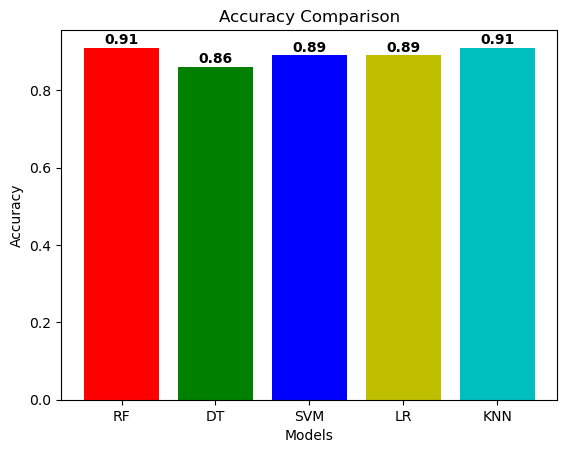

In [44]:
model_names=['RF','DT','SVM','LR','KNN']
accuracy_values=[dr_acccuracy_r,dr_acccuracy_d,dr_acccuracy_s,dr_acccuracy_l,dr_acccuracy_k]
colors = np.array(['r', 'g', 'b', 'y', 'c'])
plt.bar(model_names, accuracy_values,color=colors)
for i, v in enumerate(accuracy_values):
    plt.text(i, v+0.01, str(v), ha='center', fontweight='bold')
plt.title('Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.show()

##### maximium accuracy after Dimentionality reduction is 91.69 and the algorithm used is random forest

### f test

In [45]:
from sklearn.feature_selection import SelectKBest, f_classif
ft=SelectKBest(score_func=f_classif,k=14)
x_ft=ft.fit_transform(x_df,y)
selected_features = ft.get_support(indices=True)

# Print the selected feature indices
print(selected_features)
x_ft.shape

[ 0  1  3  4  6  7  8  9 10 12 16 17 18 19]


(2126, 14)

In [46]:
x_train,x_test,y_train,y_test=train_test_split(x_ft,y,test_size=0.3,random_state=42)

In [47]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

acccuracy_r = accuracy_score(y_test, y_pred)
report=classification_report(y_test,y_pred)
c_acccuracy_r=round(acccuracy_r,2)
print("********* Random forest Results *********")
print("Accuracy    : ", acccuracy_r)
print('------------------------------------------------')
print('classification_report :')
print(report)

********* Random forest Results *********
Accuracy    :  0.9435736677115988
------------------------------------------------
classification_report :
              precision    recall  f1-score   support

         1.0       0.96      0.98      0.97       496
         2.0       0.88      0.79      0.83       101
         3.0       0.90      0.93      0.92        41

    accuracy                           0.94       638
   macro avg       0.91      0.90      0.91       638
weighted avg       0.94      0.94      0.94       638



In [48]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)

acccuracy_d = accuracy_score(y_test, y_pred)
report=classification_report(y_test,y_pred)
c_acccuracy_d=round(acccuracy_d,2)
print("********* Decision tree Results *********")
print("Accuracy    : ", acccuracy_d)
print('------------------------------------------------')
print('classification_report :')
print(report)

********* Decision tree Results *********
Accuracy    :  0.9263322884012539
------------------------------------------------
classification_report :
              precision    recall  f1-score   support

         1.0       0.96      0.96      0.96       496
         2.0       0.80      0.76      0.78       101
         3.0       0.87      0.95      0.91        41

    accuracy                           0.93       638
   macro avg       0.87      0.89      0.88       638
weighted avg       0.93      0.93      0.93       638



In [49]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

acccuracy_l = accuracy_score(y_test, y_pred)
report=classification_report(y_test,y_pred)

c_acccuracy_l=round(acccuracy_l,2)
print("********* Logistic regression Results *********")
print("Accuracy    : ", acccuracy_l)
print('------------------------------------------------')
print('classification_report :')
print(report)

********* Logistic regression Results *********
Accuracy    :  0.8934169278996865
------------------------------------------------
classification_report :
              precision    recall  f1-score   support

         1.0       0.95      0.94      0.94       496
         2.0       0.70      0.70      0.70       101
         3.0       0.74      0.83      0.78        41

    accuracy                           0.89       638
   macro avg       0.79      0.82      0.81       638
weighted avg       0.90      0.89      0.89       638



In [50]:
svm=SVC(kernel='linear')
svm.fit(x_train,y_train)
y_pred=svm.predict(x_test)

acccuracy_s = accuracy_score(y_test, y_pred)
report=classification_report(y_test,y_pred)

c_acccuracy_s=round(acccuracy_s,2)
print("********* support vector machine Results *********")
print("Accuracy    : ", acccuracy_s)
print('------------------------------------------------')
print('classification_report :')
print(report)

********* support vector machine Results *********
Accuracy    :  0.9043887147335423
------------------------------------------------
classification_report :
              precision    recall  f1-score   support

         1.0       0.96      0.94      0.95       496
         2.0       0.72      0.73      0.73       101
         3.0       0.78      0.85      0.81        41

    accuracy                           0.90       638
   macro avg       0.82      0.84      0.83       638
weighted avg       0.91      0.90      0.91       638



In [51]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

acccuracy_k = accuracy_score(y_test, y_pred)
report=classification_report(y_test,y_pred)

c_acccuracy_k=round(acccuracy_k,2)
print("********* support vector machine Results *********")
print("Accuracy    : ", acccuracy_k)
print('------------------------------------------------')
print('classification_report :')
print(report)

********* support vector machine Results *********
Accuracy    :  0.9153605015673981
------------------------------------------------
classification_report :
              precision    recall  f1-score   support

         1.0       0.95      0.96      0.96       496
         2.0       0.81      0.70      0.75       101
         3.0       0.76      0.85      0.80        41

    accuracy                           0.92       638
   macro avg       0.84      0.84      0.84       638
weighted avg       0.91      0.92      0.91       638



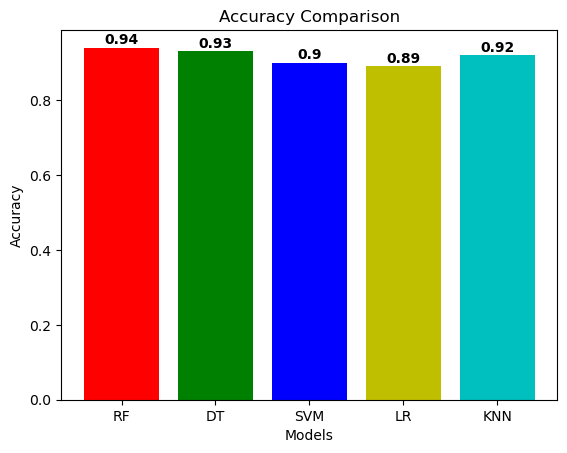

In [52]:
model_names=['RF','DT','SVM','LR','KNN']
accuracy_values=[c_acccuracy_r,c_acccuracy_d,c_acccuracy_s,c_acccuracy_l,c_acccuracy_k]
colors = np.array(['r', 'g', 'b', 'y', 'c'])
plt.bar(model_names, accuracy_values,color=colors)
for i, v in enumerate(accuracy_values):
    plt.text(i, v+0.01, str(v), ha='center', fontweight='bold')
plt.title('Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.show()

##### maximium accuracy after feature selection (f test ) is 95 and the algorithm used is random forest

## Result

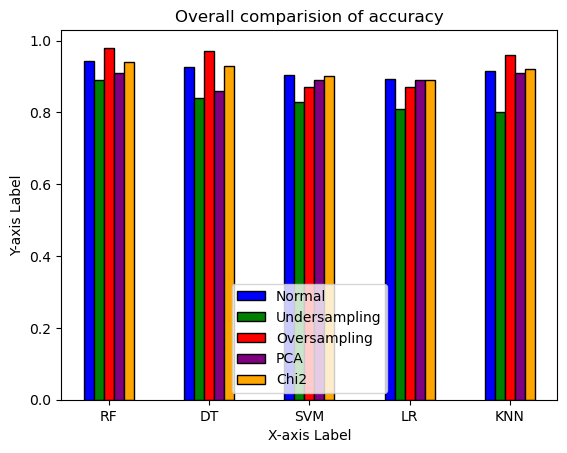

In [53]:
x1=['RF','DT','SVM','LR','KNN']
y1=[acccuracy_r,acccuracy_d,acccuracy_s,acccuracy_l,acccuracy_k]
y2=[u_acccuracy_r,u_acccuracy_d,u_acccuracy_s,u_acccuracy_l,u_acccuracy_k]
y3=[o_acccuracy_r,o_acccuracy_d,o_acccuracy_s,o_acccuracy_l,o_acccuracy_k]
y4=[dr_acccuracy_r,dr_acccuracy_d,dr_acccuracy_s,dr_acccuracy_l,dr_acccuracy_k]
y5=[c_acccuracy_r,c_acccuracy_d,c_acccuracy_s,c_acccuracy_l,c_acccuracy_k]


bar_width = 0.1
# Set the positions of the bars on the x-axis
r1 = np.arange(len(x1))
r2 = [x1 + bar_width for x1 in r1]
r3 = [x1 + 2*bar_width for x1 in r1]
r4 = [x1 + 3*bar_width for x1 in r1]
r5 = [x1 + 4*bar_width for x1 in r1]

# Plot the bars
plt.bar(r1, y1, width=bar_width, color='blue', edgecolor='black', label='Normal')
plt.bar(r2, y2, width=bar_width, color='green', edgecolor='black', label='Undersampling')
plt.bar(r3, y3, width=bar_width, color='red', edgecolor='black', label='Oversampling')
plt.bar(r4, y4, width=bar_width, color='purple', edgecolor='black', label='PCA')
plt.bar(r5, y5, width=bar_width, color='orange', edgecolor='black', label='Chi2')

# Add labels, title, and legend
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Overall comparision of accuracy')
plt.xticks([r + 2*bar_width for r in range(len(x1))], x1)
plt.legend()

# Show the plot
plt.show()


# oversampling techniques

In [56]:
def model(X_resampled, y_resampled ):
        x_train,x_test,y_train,y_test=train_test_split(X_resampled,y_resampled,test_size=0.3,random_state=42)
        rf=RandomForestClassifier()
        rf.fit(x_train,y_train)
        y_pred=rf.predict(x_test)

        Random_acccuracy = accuracy_score(y_test, y_pred)
        report=classification_report(y_test,y_pred)
        Random_acccuracy=round(Random_acccuracy,2)
        print("********* Random forest Results *********")
        print("Accuracy    : ", Random_acccuracy)
        print('------------------------------------------------')
        print('classification_report :')
        print(report)

### Random Oversampling:

In [57]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_resampled, y_resampled = ros.fit_resample(x_df,y)

model(X_resampled, y_resampled )

********* Random forest Results *********
Accuracy    :  0.98
------------------------------------------------
classification_report :
              precision    recall  f1-score   support

         1.0       0.99      0.95      0.97       520
         2.0       0.95      0.99      0.97       485
         3.0       0.99      1.00      1.00       485

    accuracy                           0.98      1490
   macro avg       0.98      0.98      0.98      1490
weighted avg       0.98      0.98      0.98      1490



### SMOTE (Synthetic Minority Over-sampling Technique):



In [58]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(x_df,y)
model(X_resampled, y_resampled )

********* Random forest Results *********
Accuracy    :  0.97
------------------------------------------------
classification_report :
              precision    recall  f1-score   support

         1.0       0.98      0.96      0.97       520
         2.0       0.95      0.98      0.96       485
         3.0       0.99      0.99      0.99       485

    accuracy                           0.97      1490
   macro avg       0.97      0.97      0.97      1490
weighted avg       0.97      0.97      0.97      1490



### ADASYN (Adaptive Synthetic Sampling):

In [59]:
from imblearn.over_sampling import ADASYN

adasyn = ADASYN()
X_resampled, y_resampled = adasyn.fit_resample(x_df,y)
model(X_resampled, y_resampled )

********* Random forest Results *********
Accuracy    :  0.97
------------------------------------------------
classification_report :
              precision    recall  f1-score   support

         1.0       0.99      0.94      0.97       519
         2.0       0.94      0.98      0.96       484
         3.0       0.98      1.00      0.99       484

    accuracy                           0.97      1487
   macro avg       0.97      0.97      0.97      1487
weighted avg       0.97      0.97      0.97      1487



### Borderline SMOTE:

In [60]:
from imblearn.over_sampling import BorderlineSMOTE

bsmote = BorderlineSMOTE()
X_resampled, y_resampled = bsmote.fit_resample(x_df,y)
model(X_resampled, y_resampled )

********* Random forest Results *********
Accuracy    :  0.98
------------------------------------------------
classification_report :
              precision    recall  f1-score   support

         1.0       0.99      0.95      0.97       520
         2.0       0.95      0.99      0.97       485
         3.0       0.99      1.00      1.00       485

    accuracy                           0.98      1490
   macro avg       0.98      0.98      0.98      1490
weighted avg       0.98      0.98      0.98      1490



### SMOTE-ENN (SMOTE combined with Edited Nearest Neighbors):

In [61]:
from imblearn.combine import SMOTEENN

smote_enn = SMOTEENN()
X_resampled, y_resampled = smote_enn.fit_resample(x_df,y)
model(X_resampled, y_resampled )

********* Random forest Results *********
Accuracy    :  0.99
------------------------------------------------
classification_report :
              precision    recall  f1-score   support

         1.0       0.99      0.98      0.99       456
         2.0       0.99      0.99      0.99       474
         3.0       0.99      1.00      0.99       467

    accuracy                           0.99      1397
   macro avg       0.99      0.99      0.99      1397
weighted avg       0.99      0.99      0.99      1397



### Random-SMOTE:

In [63]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_resampled, y_resampled = ros.fit_resample(x_df,y)

smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_resampled, y_resampled)
model(X_resampled, y_resampled )

********* Random forest Results *********
Accuracy    :  0.98
------------------------------------------------
classification_report :
              precision    recall  f1-score   support

         1.0       1.00      0.95      0.97       520
         2.0       0.96      1.00      0.98       485
         3.0       0.99      1.00      1.00       485

    accuracy                           0.98      1490
   macro avg       0.98      0.98      0.98      1490
weighted avg       0.98      0.98      0.98      1490



# ANN used as feature extration

In [91]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X_train, X_test, y_train, y_test = train_test_split(x_df,y, test_size=0.2, random_state=42)
ann = MLPClassifier(hidden_layer_sizes=(200), activation='relu', solver='adam')
ann.fit(X_train, y_train)


C:\Users\deepa\AppData\Local\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=200)

In [94]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


ann = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam')
ann.fit(X_train_scaled, y_train)


x_train_features = ann.predict(X_train_scaled)
X_test_features = ann.predict(X_test_scaled)



classifier = RandomForestClassifier()  
classifier.fit(x_train_features.reshape(-1,1), y_train)

y_pred=classifier.predict(x_test_features.reshape(-1,1))
accuracy = classifier.score(y_pred.reshape(-1,1), y_test)
print("Accuracy:", accuracy)
print("********* Random forest Results *********")
print('------------------------------------------------')
print('classification_report :')
print(report)

C:\Users\deepa\AppData\Local\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.9225352112676056
********* Random forest Results *********
------------------------------------------------
classification_report :
              precision    recall  f1-score   support

         1.0       0.95      0.95      0.95       333
         2.0       0.80      0.75      0.77        68
         3.0       0.83      0.96      0.89        25

    accuracy                           0.92       426
   macro avg       0.86      0.89      0.87       426
weighted avg       0.92      0.92      0.92       426

